# Big Data for Biologists: Decoding Genomic Function- Class 7

## How do you quantify gene expression and visualize similarities and differences of gene expression profiles across cell types? Part I
 
##  Learning Objectives
***Students should be able to***
 <ol>
 <li> <a href=#GeneExpressionIntro>Quantify gene expression and understand units of gene expression levels</a></li>
 <li> <a href=#GeneExpressionIntro>Understand what a box plot is</a></li>
 <li> <a href=#GeneExpressionIntro>Visualize gene expression variation across cell types and individuals from the GTEx project</a></li>
 <li><a href=#RNASeqDataFormat>Recognize that data from an RNA-Seq experiment can be processed and stored in a format that can be read into Python</a></li>
 <li> <a href=#IDHeaderSep>Identify the separator and header in a data table</a></li> 
 <li><a href=#LoadTable> Load a data table in .csv or .tsv format into Python</a></li>
 <li> <a href=#DataTableDim>Get the dimensions of a data table in Python  </a></li>
 <li> <a href=#MetaData>Load RNA-Seq metadata for the physiological system of a cell type into Python</a></li> 
 <li> <a href=#Slicing>Slice a data table in Python to select a subset of rows or columns. </a></li> 
 <li> <a href=#Barplot>Make a bar plot from a data table using Python </a></li>
 <li> <a href=#Transpose>Transpose a matrix using Python </a></li>
 <li> <a href=#Merge>Merge two matrices using Python </a></li>
 <li> <a href=#BinaryIndex>Use binary indexing to select elements from a dataframe. </a></li>
 

## How do you quantify gene expression?

In [ ]:
from IPython.display import HTML
HTML('<iframe src="https://drive.google.com/file/d/0B_ssVVyXv8ZSdFBNSkN5RFZDc00/preview" width="1000" height="600"></iframe>')

## How does gene expression change across cell types and individuals? 

Gene expression varies not only across cell types and tissues but also between healthy individuals and between health and diseased individuals.

The aim of the Genotype - Tissue Expression (GTEx) Project is to increase our understanding of how changes in our genes contribute to common human diseases, in order to improve health care for future generations.

Launched by the National Institutes of Health (NIH) in September 2010 (See: NIH launches Genotype-Tissue Expression project), GTEx has created a resource that researchers can use to study how inherited changes in genes lead to common diseases.  It has established a database and a tissue bank that can be used by many researchers around the world for future studies.

GTEx portal is at https://www.gtexportal.org/home/

In [ ]:
HTML('<iframe src="https://drive.google.com/file/d/0B_ssVVyXv8ZSV2xYRnlHSDJMUTA/preview" width="1000" height="480"></iframe>')

Boxplots are a type of graph that is often used to visualize changes in gene expression, as in the GTEx examples below. We will use a python library called [plotnine](https://plotnine.readthedocs.io/en/stable/) to generate boxplots that illustrated changes in gene expression. 

Let's revisit the genes that we examined in the Washu Browser in the last tutorial. Click on the link next to each gene to navigate to the GTEx entry for the gene. 

* MYOD1 - muscle https://www.gtexportal.org/home/gene/MYOD1
* NEUROD1 - neurons https://www.gtexportal.org/home/gene/NEUROD1
* SPI1 - blood https://www.gtexportal.org/home/gene/SPI1
* HNF4A - Liver and related https://www.gtexportal.org/home/gene/HNF4A
* GTF2B - Ubiquitous gene https://www.gtexportal.org/home/gene/GTF2B


## How is data from an RNA-Seq experiment processed and stored in a format that can be read into Python? <a name='RNASeqDataFormat' />

We are now going to look at processed and normalized data from the ENCODE portal. 410 RNA-seq samples were collected across multiple tissues and cell types. We begin by looking at the number of sequence reads that align to each gene. The data is stored in a matrix format, with each row corresponding to a gene in the human genome and each column corresponding to an RNA-seq experiment. The values in the matrix are read counts -- specifically the number of reads that align to a given gene. We normalize the data to "counts per million". 
![alt text](../Images/7-StartingDataFiles.png)

To start analyzing the data from the RNA-Seq experiment one of the first steps is reading the data into a program that can be used for the analysis. 

We'll be using Python and will need to first cover some general information about working with datatables. 

# Identify the separator and header in a data table  <a name='IDHeaderSep' />

Two common formats for data tables are comma separated values (**.csv**) files or tab separated values (**.tsv**) files.

In order to read a data table into a program, you often need to know the format of the file. One way to check the format is to look at the files in a text editor. In the figure below, you can see the differences between a file saved in .csv or .tsv format. 

Also, when you read a data table into Python (or R) you often need to specify which row of the file has the column labels. This row is referred to as a **header**.

Sometimes a file has extra lines above the header, so you may need to tell the program not to read that row since the extra lines may not have the same number of columns as the rest of the table and they can mess up the formatting. 
![alt text](../Images/6-Tables-CSV-TSV.png)


# Load a data table in .csv or .tsv format into Python <a name='LoadTable' />

To read our RNA-Seq data table into Python, we are going to be using the <i>pandas</i> package. 

<i>Pandas</i> adds functionality to working with data in Python. You can learn more about <i>pandas</i> at the following [link](http://pandas.pydata.org/). In particular, <i>pandas</i> introduces a variable type called dataframes which are a convient way of working with tables.

After we have imported the <i>pandas</i> package into Python, we can load a .csv or .tsv file with the read_csv or read_table command. 

The RNA-Seq data that we will be using is a .tsv file.

Note that the read command also asks for you to specify the row number for the header which in our case is the first line, denoted zero in Python. 

Take a look at reading in a file in the example below. 

In [2]:
!ls

'7-RNAseq quantification variation.ipynb'


In [3]:
# load the pandas package and define an abbreviation (or alias) 
import pandas as pd   

# read_table loads a tabular data file into python with tab as the default separator
# read_csv loads a tabular data file into python with comma as the deafault separator
# header gives the number of the row that will be used for column names

#Step 1: Read in the normalized data. 
rnaseq_data = pd.read_table(
      filepath_or_buffer='/home/jovyan/humbio51/datasets/RNAseq/rnaseq_normalized.tsv.gz', 
      header=0,
      index_col=0)

Thought questions: 

* What would you change the code above to read in a .csv file?
* How would you need to change the code if your column names were in the third row? 

# How do I know how many genes and cell types I have in my data set (aka. Get the dimensions of a data table in Python)<a name='DataTableDim' />
  
Once you've read your data set into Python, there are just a couple of commands that you need to look at the size of your dataset. 


In [4]:
#Use the 'head' command to examine the structure of your data matrix. 
rnaseq_data.head()

,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,...,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
ENSG00000242268.2,0.675065,0.277090,0.187297,-0.104115,0.384825,0.805894,0.047858,0.147409,0.292986,0.312230,...,0.653688,0.221102,0.206536,0.444246,0.246548,0.189249,0.418133,0.252317,0.326081,0.368408
ENSG00000167578.12,3.176028,2.113871,2.990098,2.860598,3.392432,2.345439,2.824117,2.697207,3.277173,3.183208,...,2.879215,3.832572,3.034219,2.787787,2.751289,3.375140,3.721178,3.144349,2.578081,1.950408
ENSG00000270112.2,-0.100813,0.325754,0.068335,-0.067226,0.145993,0.033347,-0.015703,0.305393,0.024166,0.153861,...,0.959168,-0.027327,0.121938,0.131140,0.137807,-0.031017,0.114565,0.175163,0.168535,0.027780
ENSG00000078237.4,3.750078,1.852882,3.030287,2.432092,2.051930,2.783840,2.881930,2.124639,2.829874,2.028751,...,2.116523,2.660524,2.838042,3.059306,2.241726,2.550853,2.296903,2.329019,2.827429,1.951301
ENSG00000263642.1,-0.005248,0.007042,0.002427,-0.028182,-0.000008,0.004928,0.011574,0.000988,0.011045,0.002950,...,0.001907,0.001637,0.009485,0.003524,0.006027,0.005670,-0.001775,0.011901,0.005117,0.000580


In [5]:
#Use the shape command to calculate the dimensions of your data matrix 
#shape[0] gives the number of rows, shape [1] gives the number of columns. 

num_genes=rnaseq_data.shape[0] 
num_samples=rnaseq_data.shape[1] 

#use the print command to print the variables you generated above 
print(num_genes)
print(num_samples)

55667
410


In [6]:
rnaseq_data.shape

(55667, 410)

Thought questions:
How many genes were measured in this experiment?
How many samples were measured?

 # Load RNA-Seq metadata for the physiological system of a cell type into Python<a name='MetaData' />

In our example today, we want to compare cell types in different organ systems such as the Nervous system, Musculoskeletal system or Blood. 

We have a file that lists the System, Organ and Cell Type for each Sample in the RNA-Seq experiment. This separate file with information about the samples is referred to as **metadata**. 

The metadata is stored in a file called: **'/data/datasets/RNAseq/rnaseq_metadata.txt'**. 

Since the name of the metadata table does not tell you, how can you check if the file is in .csv or .tsv format? 

Using what you learned yesterday about reading detatables into Python, write the code to read in the metadata file and to view the top of the file. 

In [10]:
!head /data/datasets/RNAseq/rnaseq_metadata.txt

Sample	System	Organ	CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello	Nervous	Brain	Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass	Musculoskeletal	Muscle	Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson	Embryonic	Trophoblast	ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass	Urinary	Kidney	Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley	Blood	Blood	Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley	Blood	Blood	Lymphoblastoid
ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras	Nervous	Brain	ES.derived
ENCSR446RKD.Fetal_Intestine_Small.UW_Glass	Gastrointestinal	Small Intestine	Small Intestine
ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder	Gastrointestinal	Colon	Colon


In [11]:
#Step 2: Load the metadata file that provides metadata annotations for each sample 
#(hint: this will be very similar to the code we wrote to load the data table)
###BEGIN SOLUTION
metadata = pd.read_table(
      filepath_or_buffer='/data/datasets/RNAseq/rnaseq_metadata.txt', 
      header=0,
      index_col=0)
###END SOLUTION 

In [12]:
num_genes=metadata.shape[0] 
num_samples=metadata.shape[1] 

#use the print command to print the variables you generated above 
print(num_genes)
print(num_samples)
metadata.head()


410
3


,System,Organ,CellType
Sample,,,
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia


## Slice a data table in Python to select a subset of rows or columns. <a name='Slicing' />

To answer the question <i>"Do cell types from the same organ system have similar gene expression profiles?</i>, we are particularly interested in the column labeled System. 

Selecting part of a table is called slicing. It is very common in data analysis work to need to slice a table to select, for example, one column, one row or a set of rows and/or columns. 

Using the <i>pandas</i> package, there are a few ways that you can select rows and columns. Below is a table from the pandas [website](https://pandas.pydata.org/pandas-docs/stable/dsintro.html), that summarizes how you can select rows and columns.  For a more complete description and set of examples see this [link](https://pandas.pydata.org/pandas-docs/stable/indexing.html).

<img src="../Images/7-Indexing_Selecting Rows and Columns 2.png" style="width: 60%; height: 60%" align="center"/>

In our example, let's look first at how we would select the System column.  



In [13]:
#Use the 'head' command to examine the structure of your data matrix. 
###BEGIN SOLUTION
metadata.head()
###END SOLUTION

,System,Organ,CellType
Sample,,,
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,Blood,Blood,Leukemia


In [14]:
x=metadata['System']
print(x)

Sample
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello            Nervous
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                              Musculoskeletal
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                       Embryonic
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                                     Urinary
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                                 Blood
                                                                                          ...       
ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras                     Blood
ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello                     Blood
ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras                               Musculoskeletal
ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras                 

In [15]:
#Write the code to make a variable x with the Cell Type instead of the System. 
###BEGIN SOLUTION
x=metadata['CellType']
print(x)
###END SOLUTION

Sample
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello    Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                                   Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                  ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                                  Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                          Leukemia
                                                                                        ...     
ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras              Lymphoma
ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello                T.cell
ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras                                   Sarcoma
ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras                   Epithelial
ENCSR000EYQ.HeLa.S3_Cer

In [16]:
#Write the code to make a variable x with the first five rows of metadata 
#(remember to use Python zero-based numbering!). 
###BEGIN SOLUTION
x=metadata.iloc[0:5]
print(x)
###END SOLUTION

                                                             System  \
Sample                                                                
ENCSR051GPK.Ganglion_Eminence_derived_primary_c...          Nervous   
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass             Musculoskeletal   
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...        Embryonic   
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                    Urinary   
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                Blood   

                                                          Organ     CellType  
Sample                                                                        
ENCSR051GPK.Ganglion_Eminence_derived_primary_c...        Brain  Neurosphere  
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                  Muscle       Muscle  
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...  Trophoblast   ES.derived  
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                 Kidney       Kidney  
ENCSR109IQO.K562_Leukemia_Ce

Notice that the second to last option in the table above indicates that you can specify the location with a Boolean vector. Boolean variables usually are variables that can take on two values, True or False. 

Using this syntax, we can write a criteria for the rows that we want to select. For example, if we want to select the rows from only the respiratory system we could specify the condition that System=='Respiratory'

In [17]:
metadata_subset=metadata.loc[metadata.System=='Respiratory']
print(metadata_subset)

                                                         System Organ  \
Sample                                                                  
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory  Lung   
ENCSR499NEL.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR917YHC.Lung.Stanford_Snyder                    Respiratory  Lung   
ENCSR074APH.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR897KTO.Alveolus_Epithelial_Primary_Cells.C...  Respiratory  Lung   
ENCSR000CPM.NHLF_Lung_Fibroblast_Primary_Cells....  Respiratory  Lung   
ENCSR733MWN.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR000AAS.Trachea_Smooth_Muscle_Primary_Cells...  Respiratory  Lung   
ENCSR000AAP.Pulmonary_Microvascular_Endothelial...  Respiratory  Lung   
ENCSR044JAQ.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR861SOG.Fetal_Lung.UW_Glass                     Respiratory  Lung   
ENCSR000AAO.NHLF_Lung_Fibroblast_Primary_Cells.... 

In the example below, we are going to want to select multiple Systems. To do this, we can use the "|" operator 

In [18]:
metadata_subset=metadata.loc[(metadata.System=='Respiratory') | (metadata.System=='Embryonic')]
print(metadata_subset)

                                                         System        Organ  \
Sample                                                                         
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...    Embryonic  Trophoblast   
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory         Lung   
ENCSR499NEL.Fetal_Lung.UW_Glass                     Respiratory         Lung   
ENCSR593AMV.hESC_Derived_CD56._Ectoderm_Culture...    Embryonic     Ectoderm   
ENCSR663WGC.H1_Derived_Mesenchymal_Stem_Cells.U...    Embryonic   ES.derived   
ENCSR950PSB.H1_Cells.UCSF_Costello                    Embryonic          ESC   
ENCSR976JGI.H1_BMP4_Derived_Mesendoderm_Culture...    Embryonic   ES.derived   
ENCSR917YHC.Lung.Stanford_Snyder                    Respiratory         Lung   
ENCSR074APH.Fetal_Lung.UW_Glass                     Respiratory         Lung   
ENCSR897KTO.Alveolus_Epithelial_Primary_Cells.C...  Respiratory         Lung   
ENCSR282KJZ.ES.UCSF4_Cells.UCSF_Costello

A more compact way, however, to select a list of cell types is to define a variable for the list of cell types and then use the <i>pandas</i> isin function.  

In [19]:
#define the list of cell types
systems_subset=["Blood","Embryonic","Immune","Respiratory"]

#select the rows in metadata for which the System is one of the 
metadata_subset=metadata.loc[metadata['System'].isin(systems_subset)]

print(metadata_subset)

                                                         System        Organ  \
Sample                                                                         
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Culture...    Embryonic  Trophoblast   
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley            Blood        Blood   
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_...        Blood        Blood   
ENCSR000CUA.Primary_hematopoietic_stem_cells.CS...        Blood        Blood   
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Prim...  Respiratory         Lung   
...                                                         ...          ...   
ENCSR000CUC.Primary_monocytes_from_peripheral_b...        Blood        Blood   
ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_G...        Blood        Blood   
ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Culture...    Embryonic     Mesoderm   
ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymph...        Blood        Blood   
ENCSR642GSA.Primary_T_CD8._naive_cells_f

Row and column indices can be combined to select subsets of a dataframe. For example, if we'd like to get the System for the sample "ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello". The syntax for row and column selection is combined to: 

![alt_text](../Images/7-GeneSampleSelect.png)


In [20]:
#First, select the column of interest. Next, use the loc command to select the row name of interest. 
example_gene_expression=metadata["System"].loc["ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello"]
print(example_gene_expression)

Nervous


In [21]:
#or, we want to get the system of the 10th sample: 
example_gene_expression=metadata["System"].iloc[9]
print(example_gene_expression)

Blood


In [22]:
tpm=rnaseq_data["ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello"].iloc[29999]
print(tpm)

0.0323622699841923


## Make a bar plot from a data table using Python<a name='Barplot' />

Now that we know how to select specific columns from a table, we are going to make a bar plot to look at the number of samples in each of the organ systems. 

Specifically, since we have limited computational resources we are going to focus on only four systems today. We want to ensure that we are selecting systems that have a sufficient number of samples. 

There are several different packages that can be used to make plots in Python. We will be using the [plotnine](https://plotnine.readthedocs.io/en/stable/api.html) package. 


In [23]:
from plotnine import * 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:284: DeprecationWa

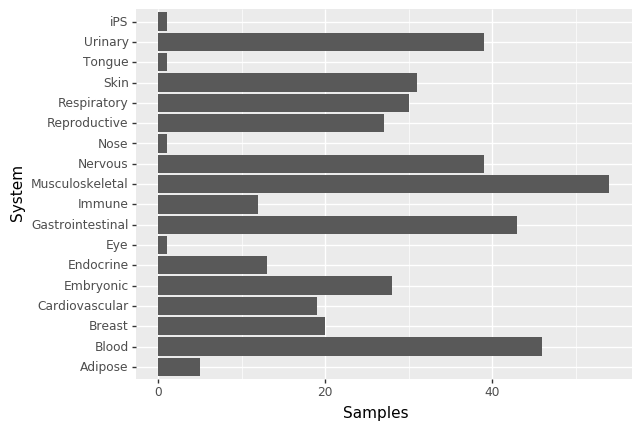

<ggplot: (8747226387361)>

In [24]:
x=metadata['System']
qplot(x=x,
      geom="bar",
      xlab="System",
      ylab="Samples")+coord_flip()

## Transpose a matrix using Python<a name='Transpose' />

It's not very convenient to have to select metadata characteristics from one dataframe and gene names from another. Merging the sample dataframe and the metadata dataframe into a single dataframe will make slicing and selecting rows and columns more straightforward. 

The first step to generate this merged dataframe is to transpose the rows and columns of "rnaseq_data". Transposition is an operation that flips the rows and columns in a matrix, like in the example below. 
![alt_text](../Images/7-transpose.png)


Currently the genes in the rnaseq_dataframe are along the row axis, while sample names are along the column axis. Transposing the matrix will place the genes along the column axis and the sample names along the row axis: 


![alt_text](../Images/7-transposeRNA.png)

In [25]:
transposed_rnaseq_data=rnaseq_data.transpose()
transposed_rnaseq_data.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000089177.13,ENSG00000124214.15,ENSG00000267117.1,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,0.675065,3.176028,-0.100813,3.750078,-0.005248,-0.008347,1.895792,0.071096,1.717195,0.086997,...,1.864442,3.767551,-0.012366,3.007283,0.106460,0.143332,0.102862,3.135837,1.171673,-0.011186
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.277090,2.113871,0.325754,1.852882,0.007042,0.022288,0.654517,0.013041,1.777113,0.168219,...,2.806932,3.914360,0.161303,2.534540,0.102920,0.029297,0.089795,3.293024,0.909186,0.017020
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.187297,2.990098,0.068335,3.030287,0.002427,0.012498,1.072950,0.041683,1.904739,0.139392,...,2.861718,4.320962,0.103156,3.166439,0.099807,0.040695,0.081328,3.832852,0.175359,-0.000313
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,-0.104115,2.860598,-0.067226,2.432092,-0.028182,0.015227,0.631293,-0.242030,2.311262,0.133319,...,2.268368,3.855545,0.191049,2.714726,0.046975,-0.183519,0.162563,3.613722,0.783756,0.003784
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,1.566472,3.608511,0.094820,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028


## Merge two matrices using Python<a name='Merge' />

Now that the rnaseq_data frame has the sample names along the row axis, same as the metadata tables, the dataframes can be merged together. This will form one matrix with the sample names as rows and the Gene Names, System, Organ and CellType as columns. The merge operation is performed on the sample name column, which is shared across both tables. 

![alt_text](../Images/7_merging_merge_on_key.png)
<img src="../Images/7-RNASeq_merged.png" style="width: 80%; height: 80%" align="center"/>

In [26]:
#merge the metadata and gene expression data into a single data frame 

merged_rnaseq_metadata=pd.merge(transposed_rnaseq_data, metadata, left_index=True,right_index=True)
merged_rnaseq_metadata.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,0.675065,3.176028,-0.100813,3.750078,-0.005248,-0.008347,1.895792,0.071096,1.717195,0.086997,...,3.007283,0.106460,0.143332,0.102862,3.135837,1.171673,-0.011186,Nervous,Brain,Neurosphere
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,0.277090,2.113871,0.325754,1.852882,0.007042,0.022288,0.654517,0.013041,1.777113,0.168219,...,2.534540,0.102920,0.029297,0.089795,3.293024,0.909186,0.017020,Musculoskeletal,Muscle,Muscle
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.187297,2.990098,0.068335,3.030287,0.002427,0.012498,1.072950,0.041683,1.904739,0.139392,...,3.166439,0.099807,0.040695,0.081328,3.832852,0.175359,-0.000313,Embryonic,Trophoblast,ES.derived
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,-0.104115,2.860598,-0.067226,2.432092,-0.028182,0.015227,0.631293,-0.242030,2.311262,0.133319,...,2.714726,0.046975,-0.183519,0.162563,3.613722,0.783756,0.003784,Urinary,Kidney,Kidney
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028,Blood,Blood,Leukemia


###  Using binary indexing to extract elements in a matrix. <a name='BinaryIndex' />

For the rest of our analysis, we want to focus on 4 Systems and check for differential gene expression among them. In the next block of code we will select these four systems.   

In [27]:
#Pick out the samples in the merged dataframe that contain the samples from the systems of interest 
systems_subset=["Blood","Embryonic","Immune","Respiratory"]
rnaseq_data_subset=merged_rnaseq_metadata.loc[merged_rnaseq_metadata['System'].isin(systems_subset)]
rnaseq_data_subset.head()

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,0.187297,2.990098,0.068335,3.030287,0.002427,0.012498,1.072950,0.041683,1.904739,0.139392,...,3.166439,0.099807,0.040695,0.081328,3.832852,0.175359,-0.000313,Embryonic,Trophoblast,ES.derived
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,0.805894,2.345439,0.033347,2.783840,0.004928,0.014051,-0.213324,0.093003,2.479022,0.062528,...,1.990848,0.062083,0.084751,0.101481,3.415822,2.394278,0.008071,Blood,Blood,Lymphoblastoid
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,0.312230,3.183208,0.153861,2.028751,0.002950,0.002064,0.783033,0.066531,3.088628,-0.031498,...,1.629999,0.081016,0.085211,0.120326,5.430897,1.120048,0.001673,Blood,Blood,HSC
ENCSR000AAN.Pulmonary_Artery_Smooth_Muscle_Primary_Cells.CSHL_Gingeras,0.160138,2.133929,0.077260,2.683576,0.003354,0.005010,0.668882,0.073288,2.662957,-0.073561,...,2.899638,0.038162,0.069725,0.142189,3.799500,0.782373,-0.013330,Respiratory,Lung,Smooth


In the code above to select the rows in rnaseq_data for each of the four organ systems we executed the line of code: 

```
rnaseq_data_subset=merged_df.loc[merged_df['System'].isin(systems_subset)]
```
Let's break down what this line of code is doing. 
First, we find all positions in `merged_df["System"]` that have a specific name. For example:  

In [28]:
name='Blood'
print(name)
merged_rnaseq_metadata['System']==name

Blood


ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello    False
ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass                                              False
ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson                 False
ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass                                             False
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley                                        True
                                                                                     ...  
ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras            True
ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello            True
ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras                               False
ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras                  False
ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold                        False

Note that `merged_rnaseq_metadata['System']==name` returns a value of "True" or "False" at each position in the` merged_rnaseq_metadata['System']` array. This is referred to as binary indexing. 

Next, we identify the rows with a value of "True", and select them from `merged_df.loc`. 
This is done with the command: 

In [29]:
merged_rnaseq_metadata.loc[merged_rnaseq_metadata["System"]==name]

,ENSG00000242268.2,ENSG00000167578.12,ENSG00000270112.2,ENSG00000078237.4,ENSG00000263642.1,ENSG00000225275.4,ENSG00000269416.1,ENSG00000268332.1,ENSG00000060642.6,ENSG00000231981.3,...,ENSG00000148943.7,ENSG00000273233.1,ENSG00000265520.1,ENSG00000231119.2,ENSG00000105063.14,ENSG00000123685.4,ENSG00000181518.2,System,Organ,CellType
ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,0.384825,3.392432,0.145993,2.051930,-0.000008,0.009046,0.286721,0.084697,2.446061,0.137258,...,2.837897,0.012638,0.069255,0.089867,4.446532,1.255056,0.009028,Blood,Blood,Leukemia
ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,0.805894,2.345439,0.033347,2.783840,0.004928,0.014051,-0.213324,0.093003,2.479022,0.062528,...,1.990848,0.062083,0.084751,0.101481,3.415822,2.394278,0.008071,Blood,Blood,Lymphoblastoid
ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,0.312230,3.183208,0.153861,2.028751,0.002950,0.002064,0.783033,0.066531,3.088628,-0.031498,...,1.629999,0.081016,0.085211,0.120326,5.430897,1.120048,0.001673,Blood,Blood,HSC
ENCSR463JBR.Primary_T_CD4._cells_from_peripheral_blood.FHCRC_Heimfeld,0.320575,3.835511,0.174681,2.486704,0.018125,-0.020857,0.322237,0.147681,2.121418,-0.039995,...,2.101508,0.081432,0.152037,0.091126,4.300350,2.197408,0.011946,Blood,Blood,T.cell
ENCSR357XTU.Primary_Natural_Killer_cells_from_peripheral_blood.FHCRC_Heimfeld,0.555738,3.575442,-0.005789,3.043581,0.007729,0.024128,0.720639,0.136476,2.707970,-0.082151,...,1.988169,0.120636,0.074425,0.118597,4.486718,2.528492,-0.001921,Blood,Blood,B.cell
ENCSR944FLL.Primary_T_CD8._cells_from_peripheral_blood.FHCRC_Heimfeld,0.429603,3.610510,0.107218,2.516675,0.032087,0.005283,0.208055,0.163229,2.836392,-0.108140,...,2.004887,0.017870,0.058872,0.168820,4.540588,1.721209,0.008164,Blood,Blood,T.cell
ENCSR409JSP.Primary_mononuclear_cells_from_peripheral_blood.UCSF_Costello,0.535080,3.276120,0.128316,3.384738,0.015257,0.017346,1.002212,0.078346,1.524618,0.047524,...,2.311963,0.039015,0.072659,0.153344,4.331615,2.519151,0.010900,Blood,Blood,T.cell
ENCSR000AEN.K562_Leukemia_Cells.UConn_Graveley,0.420257,3.292747,0.159780,2.286417,0.000002,0.014587,0.376586,0.092138,2.434134,0.070519,...,2.984394,0.105876,0.080906,0.105480,4.625233,1.684109,0.012404,Blood,Blood,Leukemia
ENCSR000AEC.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,0.335304,3.898733,0.092155,2.560408,0.005125,0.011010,0.176536,0.056851,2.474794,-0.077070,...,1.586063,0.101424,0.038773,0.131196,4.197135,3.208557,-0.005073,Blood,Blood,Lymphoblastoid
ENCSR830HIN.Primary_hematopoietic_stem_cells.FHCRC_Heimfeld,2.104426,3.715917,0.057036,1.338920,0.010232,-0.001159,-0.511689,0.088816,2.315444,0.031533,...,2.255671,0.260768,0.140839,0.212931,4.825352,2.363840,0.002389,Blood,Blood,HSC


This has allowed us to create positional indices from the binary True/False indices. 

In [30]:
#Lets now check the row & column numbers in rnaseq_data_subset 
print(rnaseq_data_subset.shape[0])#prints number of rows -- this is the gene axis 
print(rnaseq_data_subset.shape[1])#prints number of columns 


116
55670


Earlier the size of the matrix was:

55667 <br>
410 

Thought question: What is the difference between the rnaseq_data_subset matrix that we just made and the original rnaseq_data matrix?

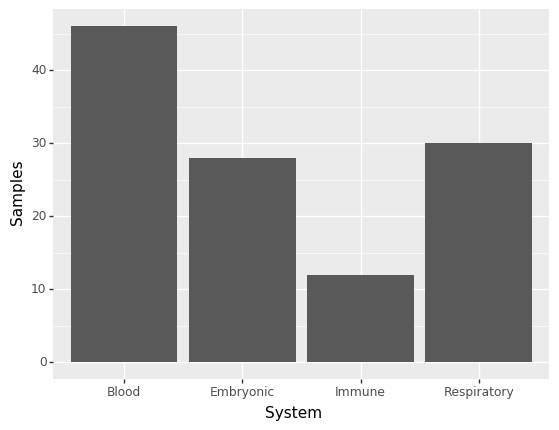

<ggplot: (8747226383013)>

In [31]:
#Now, we create a barplot with just our 4 organ systems of interest 
x=rnaseq_data_subset['System']
qplot(x=x,
      geom="bar",
      xlab="System",
      ylab="Samples")

As a final step in preparing the dataframe, we are only interested in genes that are differentially expressed across samples, so we can exclude genes that have 0 TPM
in all samples -- these are not of interest. We can use the sum command to find such genes 


In [32]:
#Selects rows in the datafile subset for which the sum of the columns is not = to zero. 
rnaseq_data_subset=rnaseq_data_subset[rnaseq_data_subset.sum(axis=1)!=0]


In [33]:
#Lets now check the row & column numbers in rnaseq_data_subset 
print(rnaseq_data_subset.shape[0])#prints number of rows -- this is the gene axis 
print(rnaseq_data_subset.shape[1])#prints number of columns 


116
55670


Thought question: How many genes had TPM of 0 in all samples?